# Core Mission

- 다음질문에 답하시오.
    - 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 이러한 수치의 합이 가장 큰 캐릭터는 누구인가? 이를 보이기 위한 과정을 보여라.
    - 좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알고 싶다. 이를 표현하기 위한 적절한 그래프를 선택해서 이를 위한 전처리를 진행하고, 시각화하여라.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
char_stat = pd.read_csv('./charcters_stats.csv')

char_stat.head(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


In [12]:
char_stat.count()

Name            611
Alignment       608
Intelligence    611
Strength        611
Speed           611
Durability      611
Power           611
Combat          611
Total           611
dtype: int64

In [7]:
char_stat.isnull().sum()

Name            0
Alignment       3
Intelligence    0
Strength        0
Speed           0
Durability      0
Power           0
Combat          0
Total           0
dtype: int64

### 능력치가 가장 좋은 캐릭터 : Martian Manhunter

In [8]:
char_stat[char_stat.loc[:,'Total']==char_stat['Total'].max()]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581


### 좋은 캐릭터 vs 나쁜 캐릭터
- 누가 이길까?

In [16]:
char_stat.groupby(by='Alignment').mean()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
Alignment,,,,,,,
bad,50.018182,34.363636,27.684848,46.284848,44.230303,44.630303,247.212121
good,41.995370,26.638889,26.685185,39.293981,38.291667,42.085648,214.990741
neutral,60.909091,45.727273,46.727273,75.545455,58.818182,67.636364,355.363636


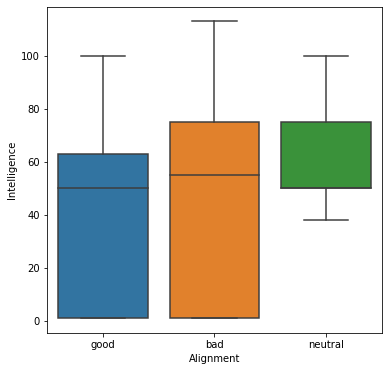

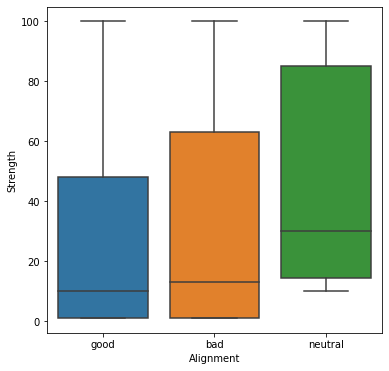

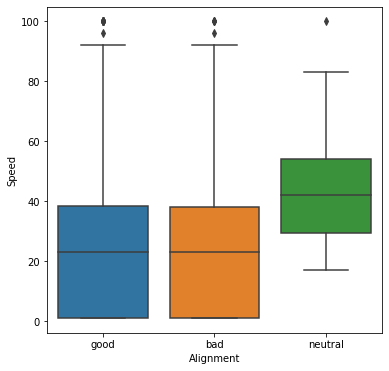

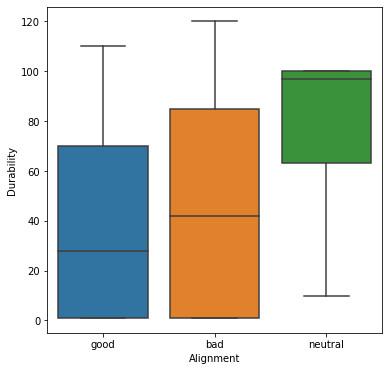

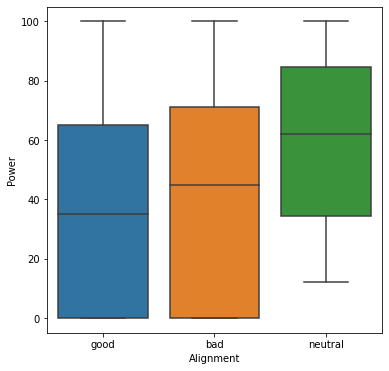

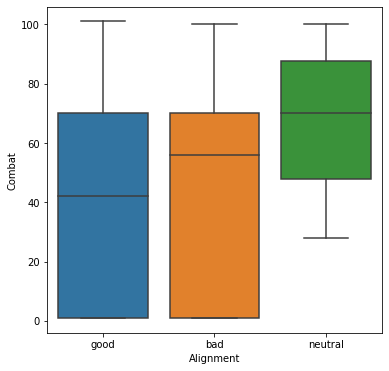

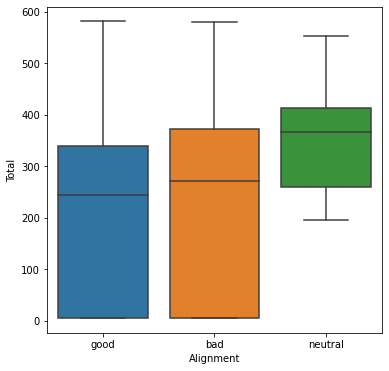

In [113]:
for idx in range(2,len(char_stat.axes[1])):
    capability = char_stat.axes[1][idx]
    plt.figure(figsize=(6,6))
    sns.boxplot(x='Alignment',y=capability,data=char_stat)

    # plt.grid()
    plt.show()

## 모든 능력치가 봤을땐 나쁜 케릭터의 능력치가 더 높다!!!

### 그렇다면 착한 캐릭터가 이길 방법은... 인해전술?

In [120]:
char_stat.groupby('Alignment')['Name'].count()['bad']

## 432 vs 165... 

165

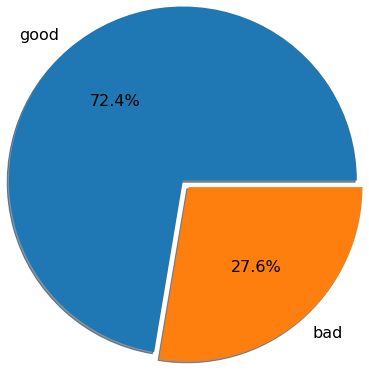

In [142]:
Alingnment = [char_stat.groupby('Alignment')['Name'].count()['good'],
              char_stat.groupby('Alignment')['Name'].count()['bad'],
             ]
#char_stat.groupby('Alignment')['Name'].count()['neutral']
explode = (0.1, 0) 

patches, texts, autotexts = plt.pie(Alingnment, explode=explode, labels=['good','bad'],autopct='%1.1f%%',
                            shadow=True, radius=2)
texts[0].set_fontsize(16)
texts[1].set_fontsize(16)

autotexts[0].set_fontsize(16)
autotexts[1].set_fontsize(16)

plt.show()

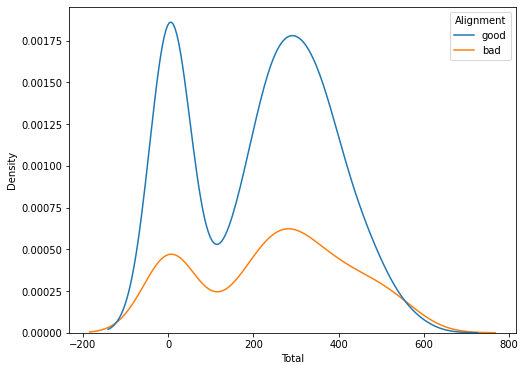

In [145]:
goodNbad_stat = char_stat[char_stat['Alignment'].isin(['good','bad'])]

plt.figure(figsize=(8,6))
sns.kdeplot(x='Total',data=goodNbad_stat,hue='Alignment')

plt.show()

### Total 능력치로 봤을 경우 가장 센 놈은 나쁜 캐릭터 이지만 비슷한 경향의 Total 능력치의 분포를 가지며 그때 착한 캐릭터의 밀도가 높아 인해 전술이 통할 것 같다!!!!

# Extra Mission

- 다음 질문에 답하시오.

    - 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 또한 각 캐릭터는 DC, 마블 등 다양한 코믹스 회사를 바탕으로 하고 있다. 어떤 코믹스 회사의 캐릭터들이 능력치 합의 평균이 가장 큰가? 이를 보이기 위한 과정을 보여라.
    - 좋은 캐릭터와 나쁜 캐릭터가 격돌한다고 한다. 격돌하는 경우 캐릭터들의 능력치의 합의 평균이 큰 팀이 이긴다고 한다. 단, 불의를 못참는 중립 캐릭터들은 중립캐릭터가 없었을 당시에 열세인 팀에 가담한다. 이러한 상황일때 결과적으로 어떤 캐릭터 진영이 승리할 것인가? 이를 보이기 위한 과정을 보여라.
    - 이 데이터를 이용해 진행하고 싶은 EDA 및 시각화가 있다면 자유롭게 진행하여라.

이 과제는 핵심 임무 이후에 진행되어야 한다.